In [1]:
from pandas import read_hdf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas import Categorical
import numpy as np
%pylab inline

COLS = "Acceptable	Bad	Good	Very bad".split("\t")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = read_hdf("preds-completed.hdf", key="df")

In [3]:
big_mss = df[df.transcription.str.len() > 15]

In [4]:
big_mss.groupby(["manuscript", "page"])["Prediction"].size()

manuscript      page
btv1b10020145j  f19     18
                f20     32
                f21     18
                f22     32
                f23     22
                        ..
btv1b9081073q   f16     44
                f17     44
                f18     44
                f19     44
                f20     44
Name: Prediction, Length: 17778, dtype: int64

In [5]:
pivot = big_mss.pivot_table(index=['lang', "century", 'manuscript','page'], columns='Prediction', aggfunc='size', fill_value=0).reset_index()
pivot.head()

Prediction,lang,century,manuscript,page,Acceptable,Bad,Good,Very bad
0,fro,10,btv1b52502238m,f84,4,10,0,1
1,fro,10,btv1b52502238m,f86,0,12,0,3
2,fro,10,btv1b52502238m,f87,0,13,0,3
3,fro,10,btv1b52502238m,f88,0,11,0,2
4,fro,10,btv1b52502238m,f93,1,13,0,1


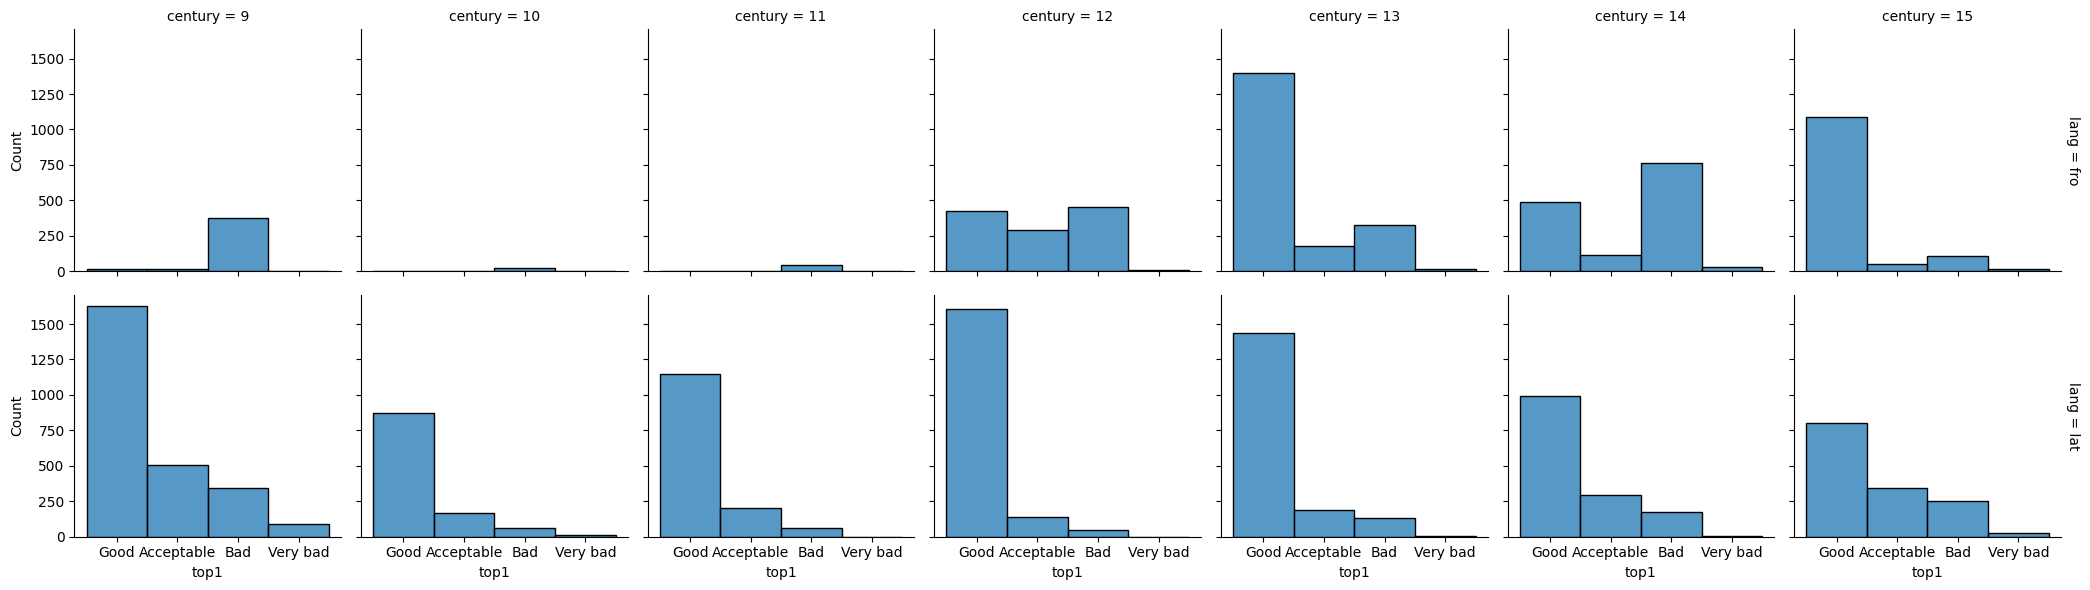

In [6]:
array = pivot[COLS].to_numpy()
pivot["top1"] = Categorical(
    [COLS[maximum] for maximum in array.argmax(axis=1).tolist()], 
    categories=["Good", "Acceptable", "Bad", "Very bad"]
)
pivot["top1simple"] = [COLS[maximum] for maximum in array.argmax(axis=1).tolist()]


sns.displot(
    pivot, col="century", row="lang", x="top1",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    col_order=sorted(pivot.century.unique(), key=lambda x: int(x))
)

In [7]:
pivot.tail()

Prediction,lang,century,manuscript,page,Acceptable,Bad,Good,Very bad,top1,top1simple
17773,lat,9,btv1b90807925,f16,3,2,53,0,Good,Good
17774,lat,9,btv1b90807925,f17,23,1,36,0,Good,Good
17775,lat,9,btv1b90807925,f18,11,0,48,0,Good,Good
17776,lat,9,btv1b90807925,f19,15,1,43,0,Good,Good
17777,lat,9,btv1b90807925,f20,6,2,52,0,Good,Good


top1simple,lang,century,manuscript,Acceptable,Bad,Good,Very bad,top1
1885,lat,9,btv1b9078418s,4,0,6,0,Good
1886,lat,9,btv1b9080761m,0,0,10,0,Good
1887,lat,9,btv1b90807747,7,2,1,0,Acceptable
1888,lat,9,btv1b9080778w,0,0,10,0,Good
1889,lat,9,btv1b90807925,0,0,10,0,Good


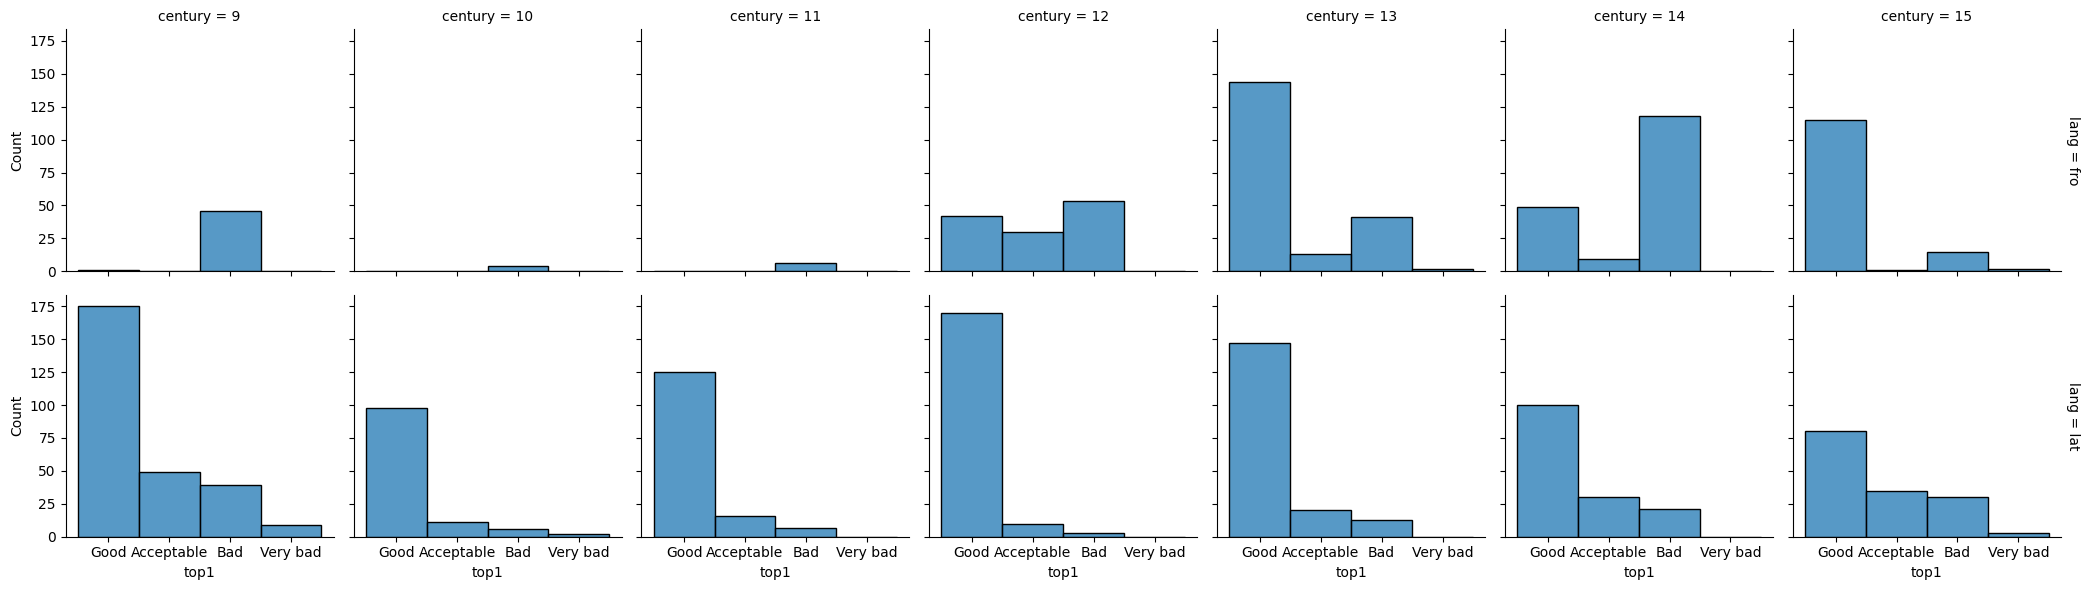

In [9]:
pivot2 = pivot.pivot_table(
    index=['lang', "century", 'manuscript'], 
    columns='top1simple', aggfunc='size', fill_value=0
).reset_index()

array = pivot2[COLS].to_numpy()
pivot2["top1"] = Categorical(
    [COLS[maximum] for maximum in array.argmax(axis=1).tolist()], 
    categories=["Good", "Acceptable", "Bad", "Very bad"]
)

sns.displot(
    pivot2, col="century", row="lang", x="top1",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    col_order=sorted(pivot2.century.unique(), key=lambda x: int(x))
)
pivot2.tail()

In [28]:
for col in ["Good", "Acceptable", "Bad", "Very bad"]:
    print(
        big_mss[(big_mss.Prediction == col) & (big_mss.lang == "fro")]
        .sample(5)
        .loc[:, ["lang", "century", "transcription", "Prediction"]]
        .sort_values(["lang", "century"]).to_latex(index=False)
        )
    print(
         big_mss[(big_mss.Prediction == col) & (big_mss.lang == "lat")]
        .sample(5)
        .loc[:, ["lang", "century", "transcription", "Prediction"]]
        .sort_values(["lang", "century"]).to_latex(index=False)
    )

/tmp/ipykernel_13358/46651413.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "fro")]
/tmp/ipykernel_13358/46651413.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "lat")]
/tmp/ipykernel_13358/46651413.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering.

\begin{tabular}{llll}
\toprule
lang & century &                                      transcription & Prediction \\
\midrule
 fro &      12 & com̃p ⁊ soubz le gomũne ne de nons de occhiy e... &       Good \\
 fro &      13 &                     S or .i. cheual. ⁊ gras. ⁊ gͦs &       Good \\
 fro &      14 &  terre de nule part. Et ceulc de Cornoaille. quant &       Good \\
 fro &      14 & riens ma dame. pourr ce q̃ ces rentes se pdient... &       Good \\
 fro &      15 &                    a la responce de ses faulxdieur &       Good \\
\bottomrule
\end{tabular}

\begin{tabular}{llll}
\toprule
lang & century &                                      transcription & Prediction \\
\midrule
 lat &      11 &               tenore decernimꝰ.ñcredi accusatori: &       Good \\
 lat &      13 &                doctrine grãm administrantabhusqb &       Good \\
 lat &      14 &    ⁊ sic eggit̾ eor m̾ncũ. et fubdit p̾anũ. ⁊dra &       Good \\
 lat &      14 & lou̾ho ułalio nio suffecish . It̃ ñ

/tmp/ipykernel_13358/46651413.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "lat")]
/tmp/ipykernel_13358/46651413.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "fro")]
/tmp/ipykernel_13358/46651413.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering.

\begin{tabular}{llll}
\toprule
lang & century &                                      transcription & Prediction \\
\midrule
 lat &      10 & supaquã pulla mopinemur informi tace materiaer... & Acceptable \\
 lat &      12 &    latere dignatur pauꝑemelenare. Qna gscĩa g̃ ca & Acceptable \\
 lat &      13 & sicam s plane ꝑuidet uolũtarẽ est q̃ dã s a... & Acceptable \\
 lat &      14 &                          aeris varietate dissoluit & Acceptable \\
 lat &       9 & Factumest autem quumes rent filiurrahel insolit... & Acceptable \\
\bottomrule
\end{tabular}

\begin{tabular}{llll}
\toprule
lang & century &                                      transcription & Prediction \\
\midrule
 fro &      13 &       recornee. perdioient il lano de cesiede. ⁊de &        Bad \\
 fro &      13 &            i ꝑent ne ioseph uentendent pas les ois &        Bad \\
 fro &      13 & dabia.Marga.Eighuans. Idwalan.Sohu.Gono gheu. E... &        Bad \\
 fro &      14 & iuir Rzure ueder demomune pouo lique

/tmp/ipykernel_13358/46651413.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "fro")]
/tmp/ipykernel_13358/46651413.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  big_mss[(big_mss.Prediction == col) & (big_mss.lang == "lat")]
